In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

**Cerinta 1:** Folositi interquartile range pentru a identifica si elimina outlier-ele. O valoare
este considerată outlier dacă este mai mică decât Q1 - 1.5IQR sau mai mare decât Q3 + 1.5IQR,
unde Q1 si Q3 sunt primul si al treilea percentile, iar IQR este diferent, a dintre Q3 si Q1. Dacă
luăm de exemplu variabila "age" din setul de date Titanic, putem calcula Q1 si Q3, apoi IQR.
Valorile care sunt în afara intervalului Q1 - 1.5IQR si Q3 + 1.5IQR pot fi considerate outlier-e
si eliminate.

In [2]:
def iqr(df):
  ############################################
              # Outlieri varsta #
  ############################################

  # calculeaza primul percentile
  ageQ1 = np.percentile(df['Age'], 25)
  # calculeaza al treilea percentile
  ageQ3 = np.percentile(df['Age'], 75)
  # interquartile range
  ageIQR = ageQ3 - ageQ1

  # valoarea sub care se afla outlieri
  ageMinValue = ageQ1 - 1.5*ageIQR
  # valoarea peste care se afla outlieri
  ageMaxValue = ageQ3 + 1.5*ageIQR

  # eliminare outlieri
  df_age_iqr = df[(df['Age'] >= ageMinValue) & (df['Age'] <= ageMaxValue)]

  df_age_iqr.reset_index(drop=True, inplace=True)

  ############################################
              # Outlieri pret #
  ############################################

  # calculeaza primul percentile
  fareQ1 = np.percentile(df['Fare'], 25)
  # calculeaza al treilea percentile
  fareQ3 = np.percentile(df['Fare'], 75)
  # interquartile range
  fareIQR = fareQ3 - fareQ1

  # valoarea sub care se afla outlieri
  fareMinValue = fareQ1 - 1.5*fareIQR
  # valoarea peste care se afla outlieri
  fareMaxValue = fareQ3 + 1.5*fareIQR

  # eliminare outlieri
  df_fare_iqr = df_age_iqr[(df_age_iqr['Fare'] >= fareMinValue) & (df_age_iqr['Fare'] <= fareMaxValue)]

  df_fare_iqr.reset_index(drop=True, inplace=True)

  return df_fare_iqr

**Cerinta 2:** Calculati Z-score pentru fiecare observatie si eliminati valorile care au un Z-score
absolut mai mare decât un anumit prag (de exemplu, 3 sau 4). Z-score reprezintă numărul de
deviatii standard fata de media setului de date. Pentru aceeasi variabilă "age", putem calcula Z-score pentru fiecare vârstă si să eliminăm valorile care au un Z-score mai mare de, să zicem, 3. Valorile cu un Z-score mai mare de 3 ar putea fi considerate outlier-e.

In [83]:
def z_score(df):
  ############################################
              # Outlieri varsta #
  ############################################

  age_zscores = stats.zscore(df['Age'])

  # cel mai asemanator cu iqr este pt 1.9
  df_age_zscore = df[abs(age_zscores) <= 1.9]

  df_age_zscore.reset_index(drop=True, inplace=True)

  ############################################
              # Outlieri pret #
  ############################################

  fare_zscores = stats.zscore(df_age_zscore['Fare'])

  # cel mai asemanator cu iqr este pt 0.7
  df_fare_zscore = df_age_zscore[abs(fare_zscores) <= 0.7]

  df_fare_zscore.reset_index(drop=True, inplace=True)

  return df_fare_zscore

Cerinta 3: Asigurati-vă că documentati si explicati procesul de curătare a datelor si motivele
din spatele eliminării. După eliminarea outlier-elor, puteti efectua o validare suplimentară pentru
a vă asigura că distributia datelor este mai uniformă si că nu ati eliminat în mod accidental valori
importante. Pentru acest lucru, puteti ruga partenerul de echipă să ruleze primele cerinte pentru
setul de date rezultat după curătarea datelor.

In [112]:
def data_analysis(df):
  df.info()
  print(df.head(10))

  plt.figure(figsize=(10, 3))
  df = df.dropna(subset='Age')
  #corelatie varsta-supravietuire (barbati)
  plt.subplot(1, 2, 1)
  df_male = df[df['Sex'] == 'male']
  survived = df_male[df_male['Survived'] == 1]['Age']
  not_survived = df_male[df_male['Survived'] == 0]['Age']
  plt.hist(survived, bins=30, alpha=0.5, color='yellow', label='Survived')
  plt.hist(not_survived, bins=30, alpha=0.5, color='blue', label='Not Survived')
  plt.xlabel('Age')
  plt.title('Age-Survived Male')

  #corelatie varsta-supravietuire (femei)
  plt.subplot(1, 2, 2)
  df_female = df[df['Sex'] == 'female']
  survived = df_female[df_female['Survived'] == 1]['Age']
  not_survived = df_female[df_female['Survived'] == 0]['Age']
  plt.hist(survived, bins=30, alpha=0.5, color='yellow', label='Survived')
  plt.hist(not_survived, bins=30, alpha=0.5, color='blue', label='Not Survived')
  plt.xlabel('Age')
  plt.title('Age-Survived Female')
  plt.legend()

  #corelatie pret_bilet-supravietuire
  plt.figure(figsize=(5, 3))
  plt.subplot()
  survived = df[df['Survived'] == 1]['Fare']
  not_survived = df[df['Survived'] == 0]['Fare']
  plt.hist(survived, bins=30, alpha=0.5, color='yellow', label='Survived')
  plt.hist(not_survived, bins=30, alpha=0.5, color='blue', label='Not Survived')
  plt.xlabel('Fare')
  plt.title('Fare-Survived')
  plt.legend()

  # corelatie clasa-varsta pentru supravietuire
  grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2, aspect=1.5, palette='pastel')
  grid.map(sns.histplot, 'Age', kde=False, bins=30)

  # corelare numar de rude la bord si supravietuire
  plt.figure(figsize=(5, 3))
  plt.subplot()
  sns.barplot(x='SibSp', y='Survived', data=df)
  plt.show()

**Cerinta 4:** Dezvoltarea unui model de clasificare pentru prezicerea sanselor de supravietuire.

Preprocesarea datelor: încărcarea datelor (pandas), înlăturarea valorilor lipsă (ex: medie),
convertirea coloanele categorice (ex: Sex, Embarked) în valori numerice, normalizarea caracteristicilor numerice.

Protocolul de testare: Împărtiti setul de date în două componente: 80% pentru antrenare
si 20% pentru validare.

Antrenare model: alegerea unui algoritm (Decision-Tree, Random Forest, etc.), antrenare
pe setul de date de antrenament

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0    

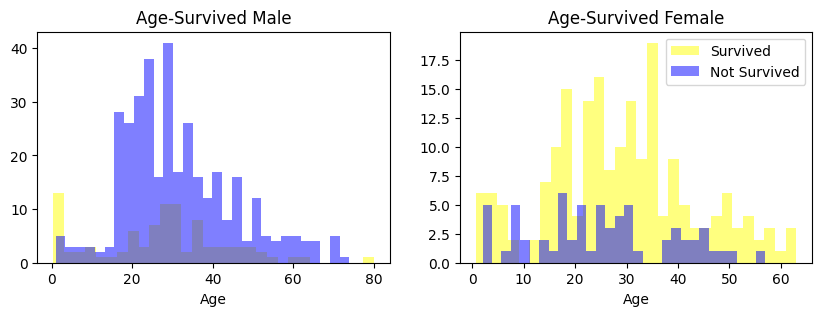

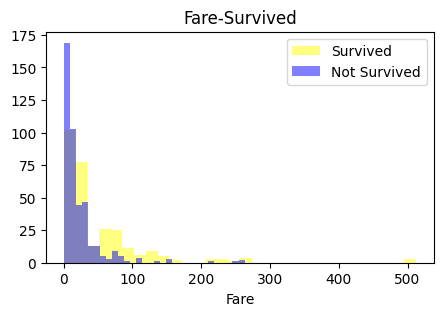

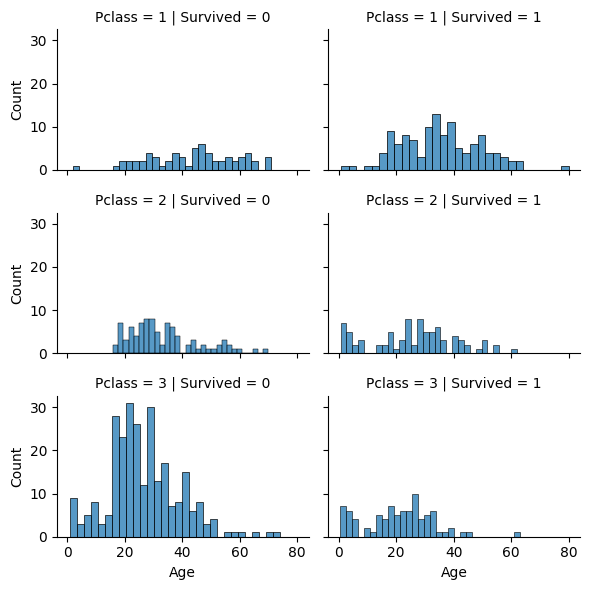

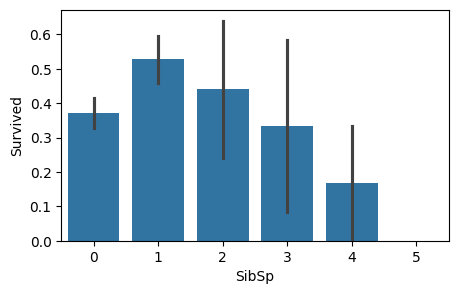

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  704 non-null    int64  
 1   Pclass    704 non-null    int64  
 2   Sex       704 non-null    object 
 3   Age       704 non-null    float64
 4   SibSp     704 non-null    int64  
 5   Parch     704 non-null    int64  
 6   Fare      704 non-null    float64
 7   Embarked  704 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 44.1+ KB
   Survived  Pclass Sex        Age  SibSp  Parch     Fare Embarked
0         0       3   1  22.000000      1      0   7.2500        2
1         1       3   0  26.000000      0      0   7.9250        2
2         1       1   0  35.000000      1      0  53.1000        2
3         0       3   1  35.000000      0      0   8.0500        2
4         0       3   1  29.699118      0      0   8.4583        1
5         0       1   1  54.000000      0

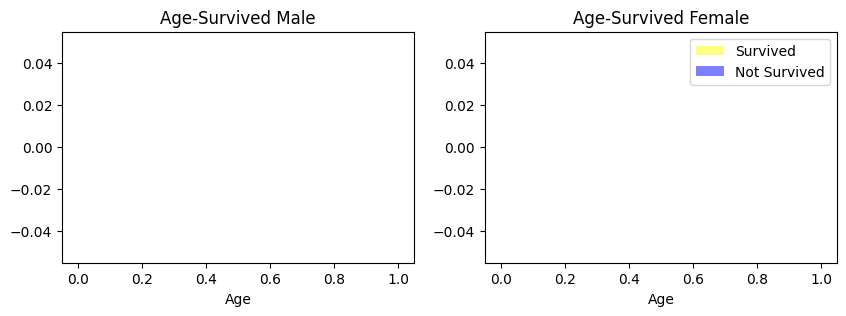

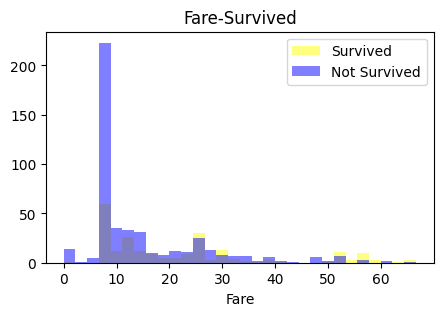

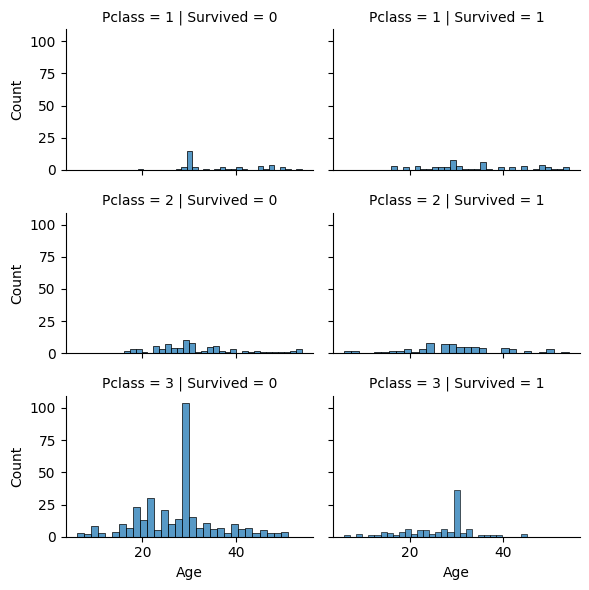

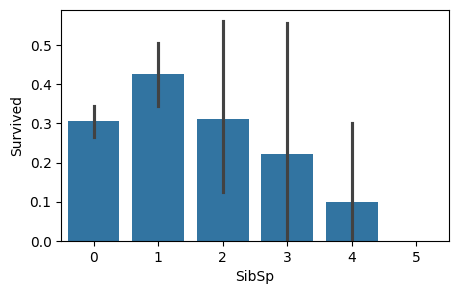

In [113]:
#citeste fisier train.csv
df_train = pd.read_csv('train.csv')

data_analysis(df_train)

#############################################
 #Pregatirea setului de date de antrenament#
#############################################

# eliminarea din setul de date de intrare a coloanelor 'PassengerId', 'Name', 'Ticket', 'Cabin'
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis='columns', inplace=True)

# completarea valorilor goale pt varsta cu media
mean = np.mean(df_train['Age'])
df_train['Age'].fillna(mean, inplace = True)

# completarea valorilor goale pentru imbarcari cu cea mai intalnita valoare
mean = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(mean, inplace=True)

# transforma Sex in coloana numerica
le = LabelEncoder()
le.fit(df_train['Sex'])
df_train.loc[:, 'Sex'] = le.transform(df_train['Sex'])

# transforma Embarked in coloana numerica
le = LabelEncoder()
le.fit(df_train['Embarked'])
df_train.loc[:, 'Embarked'] = le.transform(df_train['Embarked'])

# eliminare outlieri dupa varsta si pret
df_train = z_score(df_train)

data_analysis(df_train)

# scrierea in "filtered_train.csv" a datelor filtrate
df_train.to_csv('filtered_train.csv')

# set de date intrare - antrenament
X = df_train.drop(columns=['Survived'])

# setul de date de iesire - antrenament
y = df_train['Survived']

# normalizarea valorilor care nu sunt coloane categoriale
scaler = StandardScaler()
X_mat = scaler.fit_transform(X)
X = pd.DataFrame(X_mat, columns=X.columns)

#############################################
 #Impartirea setului de date pentru testare#
                  #sau#
    #Predictie pentru competitie Kaggle#
#############################################

#scop = input("Scop (test sau predictie): ")
scop = "tes"
if scop == "test":
  # impartire set de date
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
else:
  X_train = X
  y_train = y

  #############################################
  #Pregatirea setului de date de testare#
  #############################################

  # citeste fisier test.csv
  df_test = pd.read_csv('test.csv')

  # savlarea coloanei de id
  id = df_test['PassengerId']
  df_test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis='columns', inplace=True)

  # completarea valorilor goale pt varsta cu media
  mean = np.mean(df_test['Age'])
  df_test['Age'].fillna(mean, inplace = True)

  # completarea valorilor goale pt pret cu media
  mean = np.mean(df_test['Fare'])
  df_test['Fare'].fillna(mean, inplace = True)

  # transforma Sex in coloana numerica
  le = LabelEncoder()
  le.fit(df_test['Sex'])
  df_test.loc[:, 'Sex'] = le.transform(df_test['Sex'])

  # transforma Embarked in coloana numerica
  le = LabelEncoder()
  le.fit(df_test['Embarked'])
  df_test.loc[:, 'Embarked'] = le.transform(df_test['Embarked'])

  # normalizarea valorilor care nu sunt coloane categorice
  scaler = StandardScaler()
  mat = scaler.fit_transform(df_test)
  df_test = pd.DataFrame(mat, columns=df_test.columns)

  X_test = df_test

#############################################
  #Antrenare si predictie cu Random Forest#
#############################################
model = RandomForestClassifier(random_state=14)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

if scop == "test":
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
else:
  df_out = pd.DataFrame({
      'PassengerId': id,
      'Survived': y_pred
  })
  df_out.to_csv('prediction.csv', index=False)